Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'XEM'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2015-03-31,0.000400,0.000458,0.000170,0.000242,0.000242,65525.0,XEM-USD
2015-04-01,0.000242,0.000323,0.000227,0.000314,0.000314,28549.0,XEM-USD
2015-04-02,0.000309,0.000330,0.000291,0.000310,0.000310,20678.0,XEM-USD
2015-04-03,0.000310,0.000318,0.000251,0.000277,0.000277,23550.0,XEM-USD
2015-04-04,0.000272,0.000283,0.000218,0.000232,0.000232,26800.0,XEM-USD
...,...,...,...,...,...,...,...
2021-07-03,0.134751,0.140061,0.129912,0.137617,0.137617,49537841.0,XEM-USD
2021-07-04,0.137633,0.137633,0.126915,0.130602,0.130602,59995836.0,XEM-USD
2021-07-05,0.130591,0.136318,0.128804,0.133591,0.133591,66353406.0,XEM-USD
2021-07-06,0.133602,0.135586,0.130791,0.132116,0.132116,70615595.0,XEM-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2291 entries, 2015-03-31 to 2021-07-08
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2287 non-null   float64
 1   high      2287 non-null   float64
 2   low       2287 non-null   float64
 3   close     2287 non-null   float64
 4   adjclose  2287 non-null   float64
 5   volume    2287 non-null   float64
 6   ticker    2291 non-null   object 
 7   spread    2287 non-null   float64
dtypes: float64(7), object(1)
memory usage: 161.1+ KB


## Plot the closing value of NEM over time

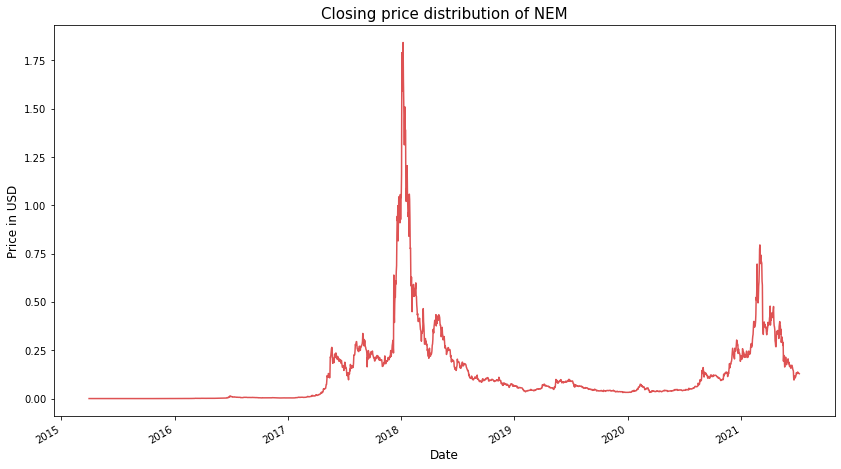

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of NEM", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Daily price spread of NEM')

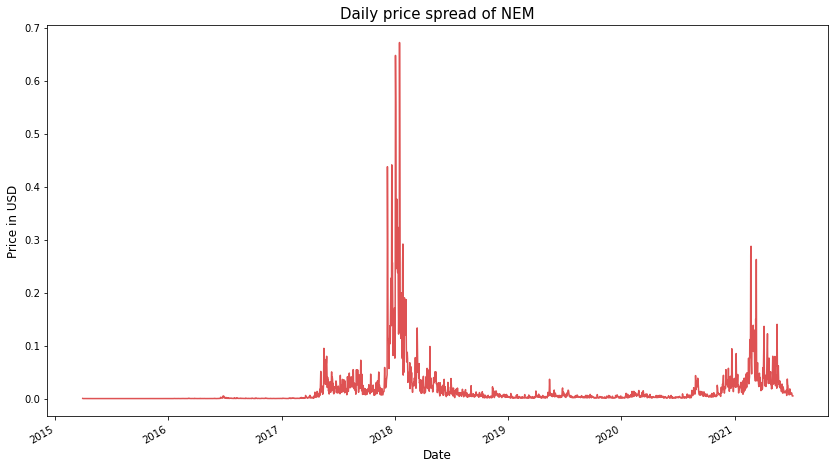

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of NEM", fontsize=15)

## Candlestick chart

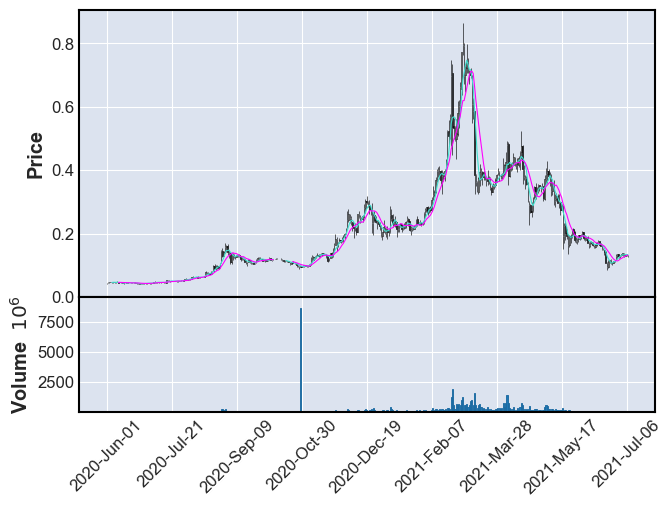

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2015-03-31,0.000242
1,2015-04-01,0.000314
2,2015-04-02,0.000310
3,2015-04-03,0.000277
4,2015-04-04,0.000232
...,...,...
2286,2021-07-03,0.137617
2287,2021-07-04,0.130602
2288,2021-07-05,0.133591
2289,2021-07-06,0.132116


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2310,2021-08-03,0.300679,0.203132,0.400835
2311,2021-08-04,0.303149,0.199197,0.404912
2312,2021-08-05,0.302639,0.198364,0.402637
2313,2021-08-06,0.305641,0.203160,0.409205
2314,2021-08-07,0.308106,0.196090,0.409644


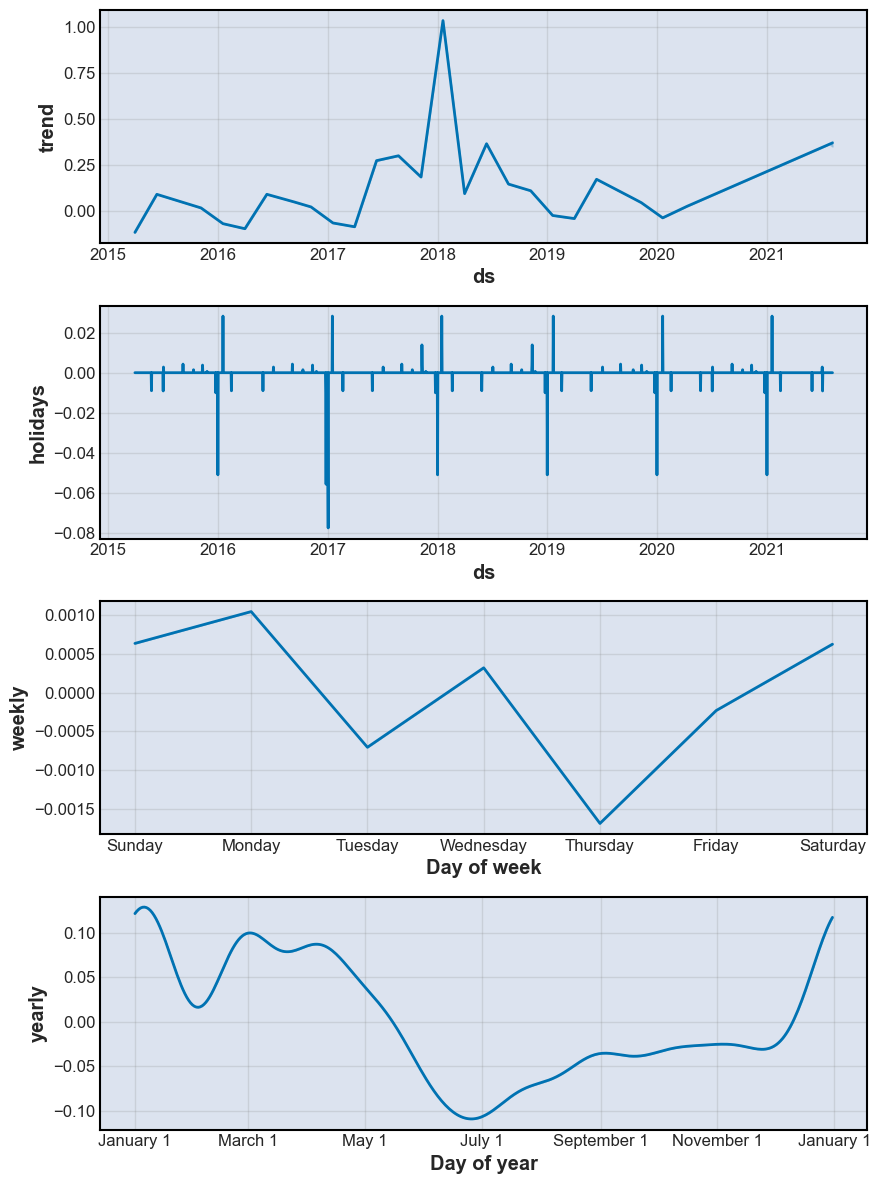

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

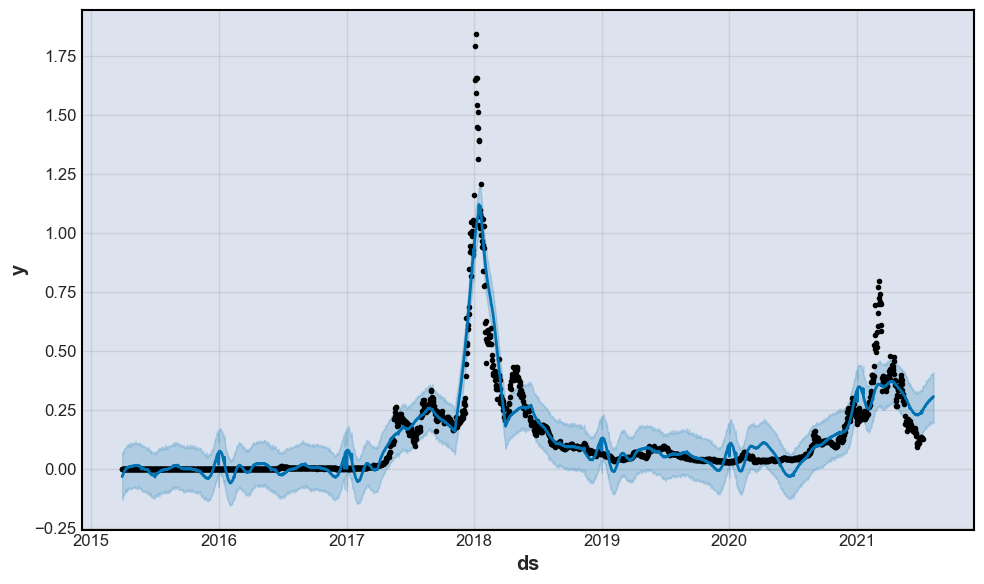

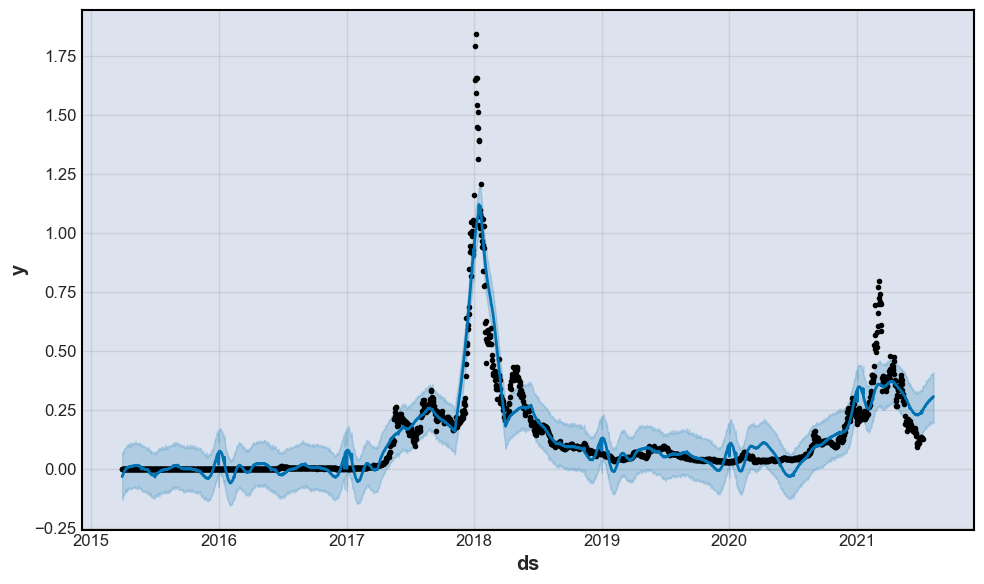

In [10]:
m.plot(forecast)